# This notebook summarizes the properties of submission

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt

In [2]:
df_meta = pd.read_excel('model_summary.xlsx', header=[1])
df_meta.replace('USA', 'United States of America', inplace=True)

In [3]:
df_meta = df_meta[~df_meta['Model Name'].str.contains('corrected')]
df_meta.reset_index(drop=True)

,Model Name,Modeller,Institution,Country,Type,Short,Medium,Long,Cross-Shore,Long-Shore,Sea level,Long-term trend,Notes
0,CNN-LSTM_EGP,Eduardo Gomez-de la Pena,Uni Aukland,New Zealand,DDM,x,NaN,NaN,*,NaN,NaN,NaN,NaN
1,COCOONED2019_JAAA,Jose A. A. Antolinez,TU Delft,Netherlands,HM,x,x,x,*,*,*,NaN,NaN
2,COCOONEDCROSS_JAAA,Jose A. A. Antolinez,TU Delft,Netherlands,HM,x,x,x,*,NaN,*,NaN,NaN
3,COCOONEDLONG_JAAA,Jose A. A. Antolinez,TU Delft,Netherlands,HM,x,x,x,NaN,*,*,NaN,NaN
4,COCOONED_LFP,Lucas de Freitas Pereira,IH Cantabria,Spain,HM,x,x,x,*,*,*,NaN,NaN
5,COCOONEDwNOISE_JAAA,Jose A. A. Antolinez,TU Delft,Netherlands,HM,x,x,x,*,*,*,NaN,NaN
6,Catboost_MI_HS,Michael Ibrahim,GIT,United States of America,DDM,x,x,x,NaN,*,NaN,NaN,NaN
7,CoSMoS-COAST-CONV_SV,Sean Vitousek,USGS,United States of America,HM,x,x,x,*,*,*,*,NaN
8,CoSMoS-COAST-Nonstat_YM,Yongjing Mao,UNSW,Australia,HM,x,x,x,*,*,*,*,NaN
9,CoSMoS-COAST_SV,Sean Vitousek,USGS,United States of America,HM,x,x,x,*,*,*,*,NaN


## Map of modellers from the world

In [4]:
def merge_strings(series):
    unique_strings = set(series.dropna().astype(str))  # Get unique non-null strings
    return '\n'.join(unique_strings)

df_meta_country = df_meta[['Country', 'Modeller', 'Institution']].groupby('Country').agg(
    {'Modeller':'count', 'Institution':merge_strings}).rename(columns={'Modeller':'# of models'})


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(df_meta_country, how='left', left_on='name', right_index=True)
world.fillna({"# of models":0}, inplace=True)

C:\Users\z3541792\AppData\Local\anaconda3\envs\GEE\lib\site-packages\ipykernel_launcher.py:8: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  


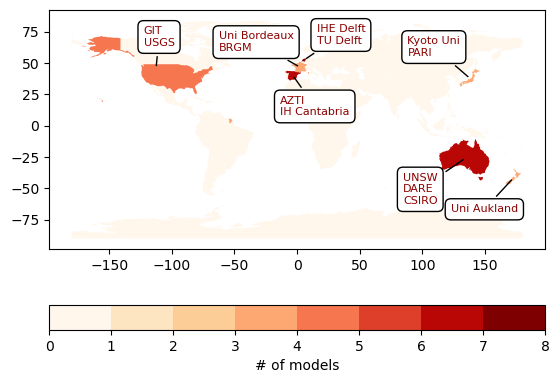

In [5]:
cmap = get_cmap('OrRd', df_meta_country['# of models'].max())
world.plot(column='# of models', cmap=cmap, vmin=0, vmax=df_meta_country['# of models'].max(), 
           legend=True, legend_kwds={'label': "# of models",'orientation': "horizontal"});

world_sub = world[~world['Institution'].isna()]
for idx, row in world_sub.iterrows():
    if row['name'] == 'France':
        centroid = row['geometry'][1].centroid
    else:
        centroid = row['geometry'].centroid
    # Add text annotation using the country's name at its centroid
    # Calculate a position for the text (offset to the right of the centroid)
    if centroid.x > 100:
        text_x = centroid.x - 50
    else:
        text_x = centroid.x - 10  # Adjust the offset as needed
    if centroid.y > 0:
        text_y = centroid.y +25
    else:
        text_y = centroid.y -25
    if row['name'] == 'Spain':
        text_y = centroid.y -25
    if row['name'] == 'France':
        text_x = centroid.x - 65
        text_y = centroid.y +20
    if row['name'] == 'Netherlands':
        text_y = centroid.y +20
        text_x = centroid.x + 10
        
    
    # Annotate with country name next to the centroid
    plt.annotate(
        text=row['Institution'],  # The text to annotate
        xy=(centroid.x, centroid.y),  # Centroid position
        xytext=(text_x, text_y),  # Text position (offset from centroid)
        ha='left',  # Horizontal alignment
        va='center',  # Vertical alignment
        fontsize=8,  # Font size
        color='darkred',  # Text color
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'),  # Box around the text
        arrowprops=dict(arrowstyle='-', color='black', lw=1)  # Line connecting text to centroid
    )
plt.savefig('figures/submissions_map.jpg', dpi=300, bbox_inches='tight')

## Creat bar chart for different tasks

In [6]:
df_meta_task = df_meta.groupby('Type')[['Short', 'Medium', 'Long']].count().cumsum().transpose().reset_index()
df_meta_task

Type,index,DDM,HM,PBM
0,Short,11,31,33
1,Medium,8,27,29
2,Long,7,20,20


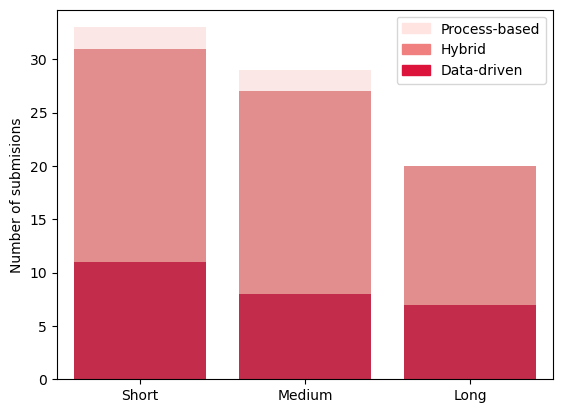

In [7]:
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.ticker as tck
# set the figure size
# bar chart 1 -> top bars (group of 'smoker=No')
fig, ax = plt.subplots(1,1)
bar0 = sns.barplot(x="index",  y="PBM", data=df_meta_task, color='mistyrose', ax=ax)
bar1 = sns.barplot(x="index",  y="HM", data=df_meta_task, color='lightcoral', ax=ax)
bar2 = sns.barplot(x="index",  y="DDM", data=df_meta_task, color='crimson', ax=ax)
ax.set_xlabel(None)
ax.set_ylabel('Number of submisions')

top_bar = mpatches.Patch(color='mistyrose', label='Process-based')
medium_bar = mpatches.Patch(color='lightcoral', label='Hybrid')
bottom_bar = mpatches.Patch(color='crimson', label='Data-driven')
ax.legend(handles=[top_bar, medium_bar, bottom_bar])
#ax.yaxis.set_major_locator(tck.MultipleLocator())
plt.savefig('figures/submissions_barplot.jpg', dpi=300, bbox_inches='tight')

# Create pie plot for different components

In [8]:
df_meta_component = df_meta.groupby('Type')[['Cross-Shore', 'Long-Shore', 'Sea level']].count()
df_meta_type = df_meta.groupby('Type')['Model Name'].count()

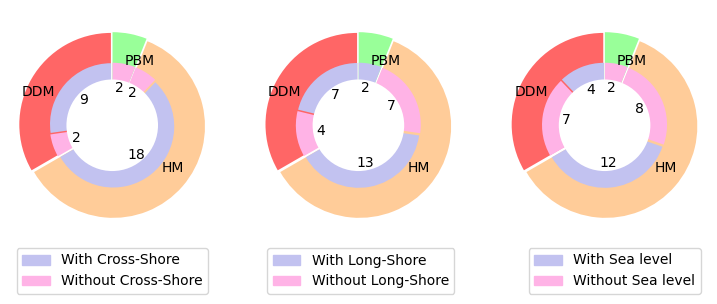

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
# Data to plot
labels = df_meta_type.index
count_type = df_meta_type.values
colors_type = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff'][:len(labels)]
explode = [0.05,0.05,0.05,0.05][:len(labels)]

def func(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return "{:d}".format(absolute) if absolute > 0 else ''

for i, component in enumerate(['Cross-Shore', 'Long-Shore', 'Sea level']):
    ax = axes[i]
    labels_comp = ['With '+ component, 'Without ' + component]*len(labels)
    with_count = df_meta_component[component].values
    without_count = count_type - df_meta_component[component].values
    count_comp = np.dstack((with_count, without_count)).reshape(-1)
    colors_comp =  ['#c2c2f0','#ffb3e6']*len(labels)
    explode_comp = [0.05, 0.05]*len(labels)
    ax.pie(count_type, labels=labels, colors=colors_type, startangle=90,frame=True, radius=3, 
           explode=explode, labeldistance=0.7)
    ax.pie(count_comp, colors=colors_comp,startangle=90, radius=2, explode=explode_comp, 
           autopct=lambda pct: func(pct, count_comp))
    centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
    ax.add_artist(centre_circle)
    ax.axis('equal')
    #ax.set_title('Component: '+ component)


    top_bar = mpatches.Patch(color='#c2c2f0', label='With {}'.format(component))
    bottom_bar = mpatches.Patch(color='#ffb3e6', label='Without {}'.format(component))
    ax.legend(handles=[top_bar, bottom_bar], bbox_to_anchor=[1,0])  

plt.savefig('figures/submissions_pieplot.jpg', dpi=300, bbox_inches='tight')